Program Explanation:
This program aims to build a model to predict diabetes using machine learning techniques. The program follows these steps


1. Data Loading:

Diabetes patient data is loaded from the file diabetes_prediction_dataset.csv.zip using the Pandas library in Python.
Initial data is displayed to ensure successful loadi



2. Data Exploration:

The data is explored using functions like describe() and info() to understand its basic characteristics.
Duplicate values are checked and removed to ensure data quality.
Missing values are checked and handled using SimpleImputer.
Different variables such as 'diabetes', 'smoking_history', 'heart_disease', and 'gender' are analyzed by calculating the frequencies of each value.
Categorical variables ('gender' and 'smoking_history') are converted to numerical values using custom mappings.
The relationship between variables is studied using the correlation matrix corr() and visualized using heatmap() from the Seaborn library.
'diabetes' data is represented graphically using countplot() to display the distribution of cases.
The distribution of the 'smoking_history' variable is displayed using countplot(), distplot(), and boxplot() to study its properties.
Outliers in the 'age' variable are examined using 




3. Model Building:

The data is split into two sets: a training set and a testing set using train_test_split().
Four machine learning models are trained: LogisticRegression, SVC, RandomForestClassifier, and GradientBoostingClassifier.
The performance of each model is evaluated using metrics such as accuracy, recall, and F1-score.
The confusion matrix is displayed for each model to better understand the classification perform




4. Model Comparison:

The performance results of the models are collected in a DataFrame for clear display.
A graphical comparison of model performance is plotted using plot() from the Matplotlib libra



5. Prediction:

The best model (GradientBoostingClassifier) is used to predict the condition of a new patient using dummy data.
The prediction result and the probability of having diabetes are display


In short:

The program loads diabetes patient data, cleans and transforms it, and then trains machine learning models to predict diabetes based on patient characteristics. Model performance is evaluated to select the best one, which is then used for prediction on new cases.

I hope this comprehensive explanation provides a clearer understanding of the program and its functionalities. Feel free to ask if you have any further inquiries.ed.ry.ance.boxplot().ng.:

In [1]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')





In [2]:
df=pd.read_csv("/kaggle/input/diabetes-prediction-eda-and-prediction-using-4-models/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.shape

(96146, 9)

In [10]:
#count the unique values in diabetes column

df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [11]:
#count the unique values in smoking_history column

df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [12]:
#count the unique values in heart_disease column

df['heart_disease'].value_counts()

heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [13]:
#count the unique values in gender column

df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [14]:
# Convert 'gender' to numerical representations using a custom mapping.
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(gender_mapping)

In [15]:
# Convert 'smoking_history' to numerical representations using a custom mapping.
smoking_mapping = {
    'never': 0,
    'current': 1,
    'former': 2,
    'ever': 3,
    'not current': 4
}

df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

In [16]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,0.065645,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.137969,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.009610,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.066394,0.061376,0.068140,0.070832,0.170711
smoking_history,0.065645,0.137969,0.009610,0.066394,1.000000,0.036117,0.018007,0.015336,0.038633
bmi,-0.023461,0.344797,0.148111,0.061376,0.036117,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.018007,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.015336,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.038633,0.214932,0.406408,0.424336,1.000000


<Axes: >

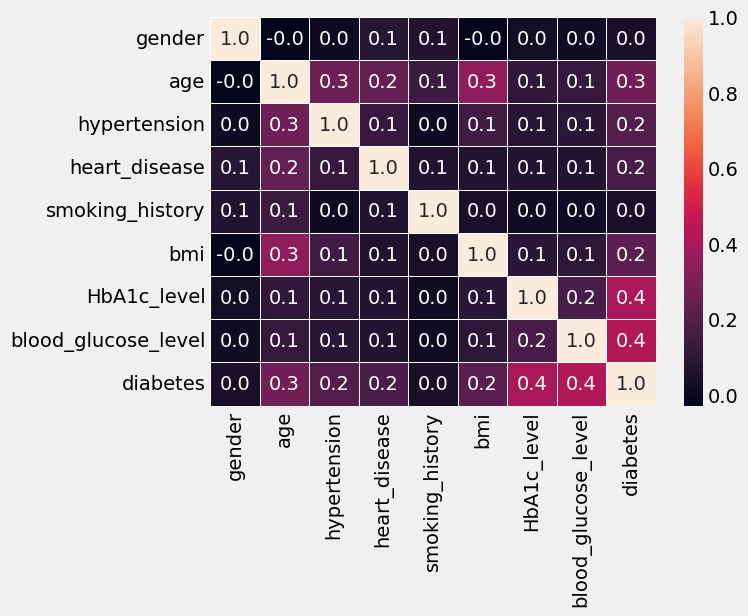

In [17]:
sns.heatmap(df.corr(),annot=True,fmt="0.1f",linewidths=.5)

<Axes: xlabel='diabetes', ylabel='count'>

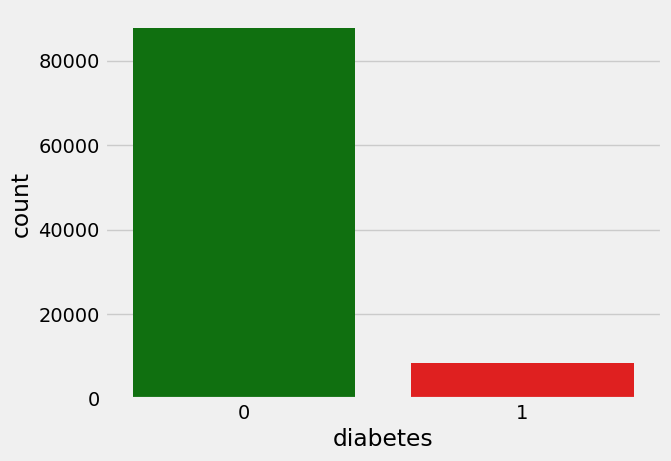

In [18]:
sns.countplot(x='diabetes',data=df,palette=["green","red"])

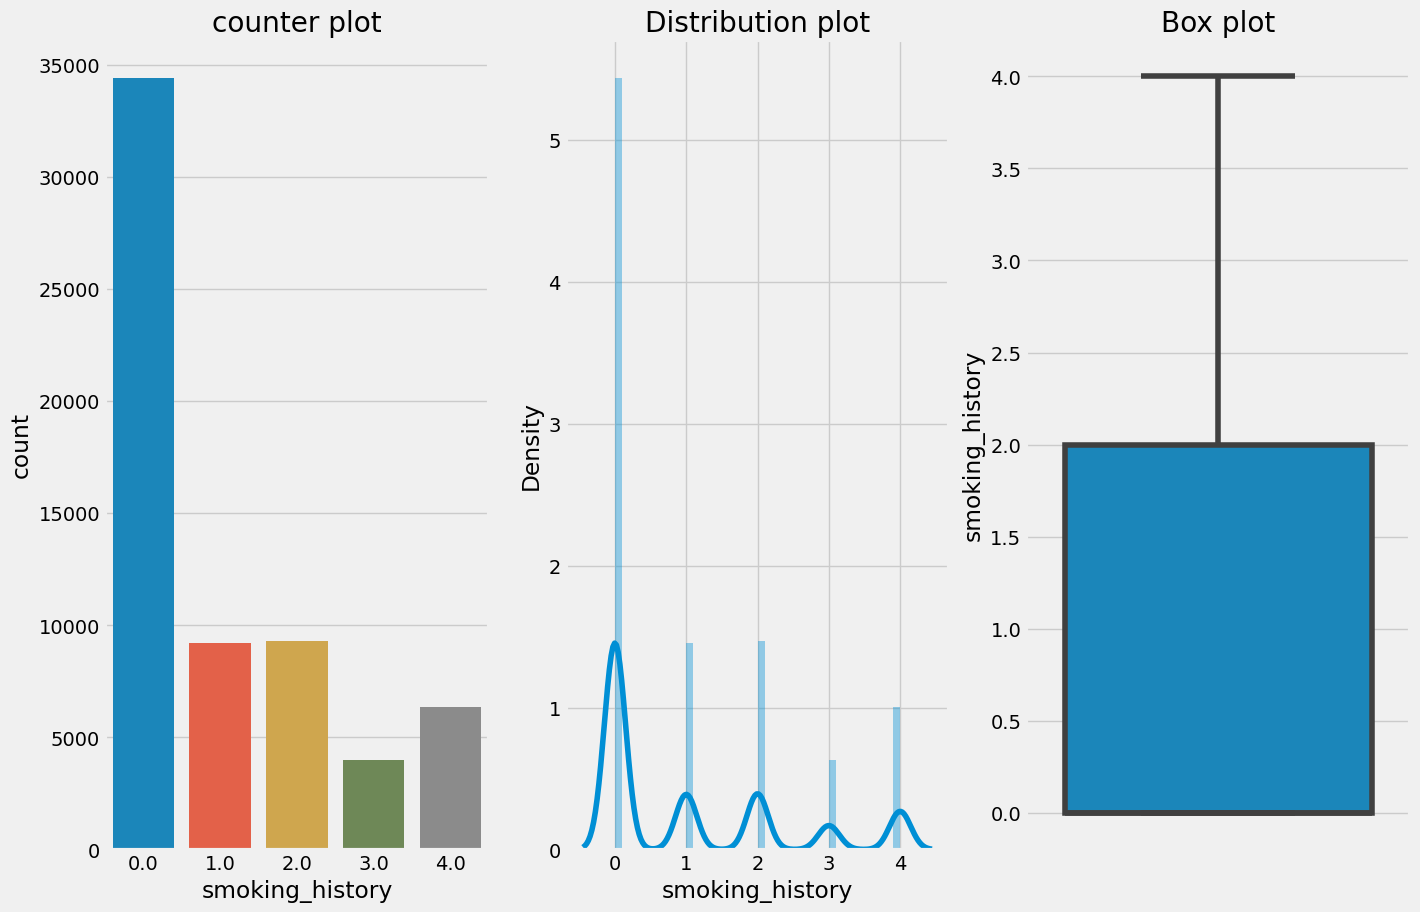

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot(x='smoking_history',data=df)

plt.subplot(1,3,2)
plt.title("Distribution plot")
sns.distplot(df['smoking_history'])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(y=df['smoking_history'])

plt.show()

<Axes: >

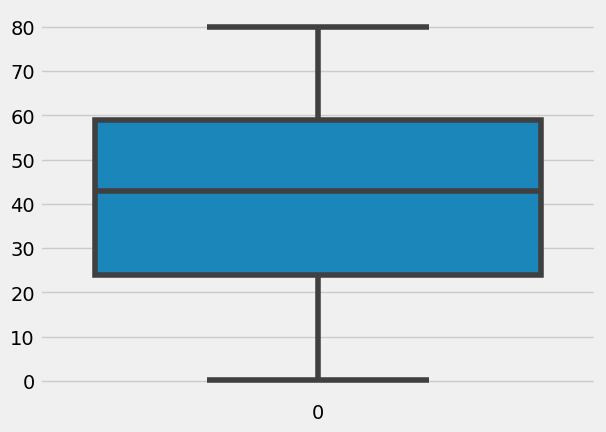

In [20]:
sns.boxplot(df.age)

In [21]:
x=df.drop("diabetes",axis=1)
y=df["diabetes"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [24]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()

In [25]:
column=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy: 0.9551222048881955
recall: 0.8717504332755632
f1: 0.6998260869565217


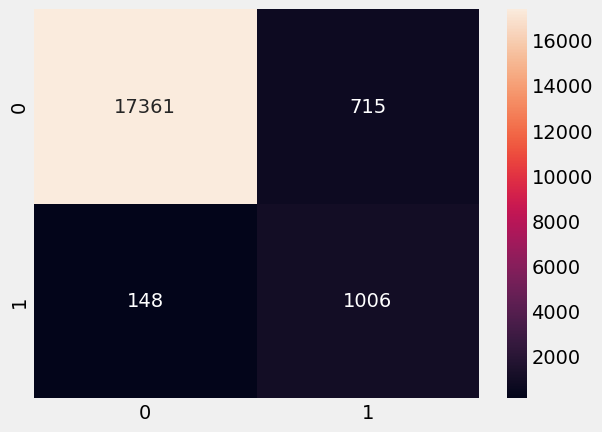

In [26]:
def  cal(model):
     model.fit(x_train,y_train)
     pre=model.predict(x_test)
     accuracy=accuracy_score(pre,y_test)
     recall=recall_score(pre,y_test)
     f1=f1_score(pre,y_test)
     result1.append(accuracy)
     result2.append(recall)
     result3.append(f1)


     sns.heatmap(confusion_matrix(pre,y_test),annot=True,fmt='g')
     print(model)
     print("accuracy:",accuracy)
     print("recall:",recall)
     print("f1:",f1)
cal(model1)

SVC()
accuracy: 0.9458658346333854
recall: 1.0
f1: 0.5664306538942107


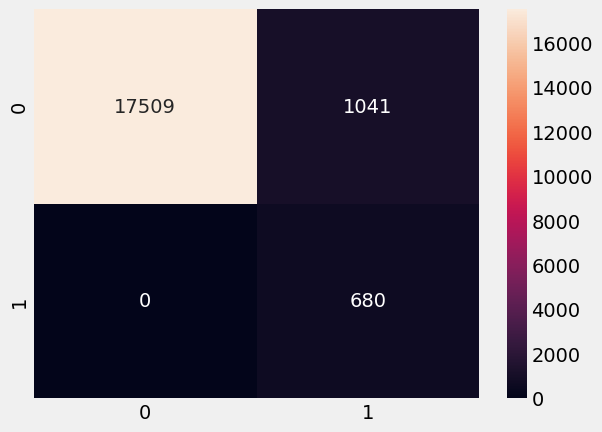

In [27]:
cal(model2)

RandomForestClassifier()
accuracy: 0.9681747269890796
recall: 0.9439551641313051
f1: 0.793939393939394


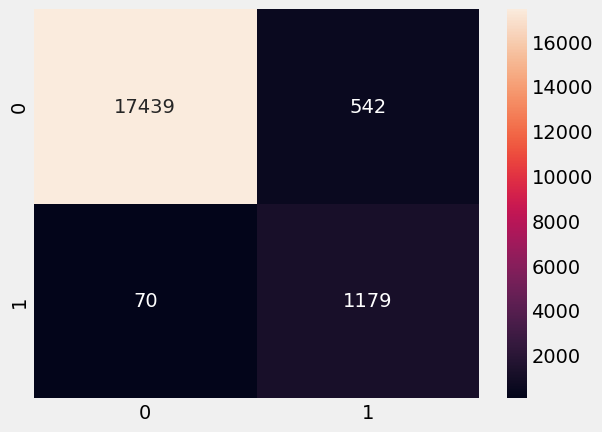

In [28]:
cal(model3)

GradientBoostingClassifier()
accuracy: 0.9707748309932397
recall: 0.9849372384937238
f1: 0.8072702331961591


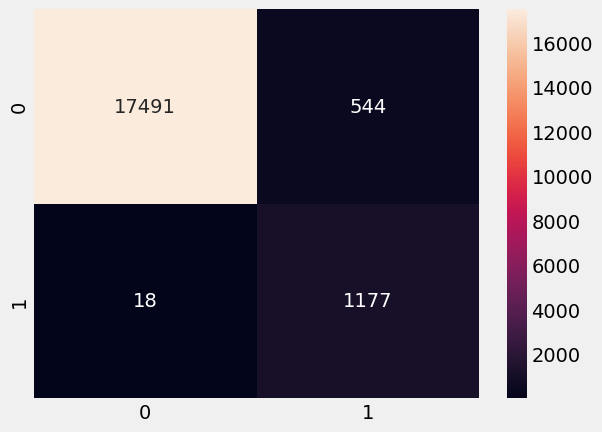

In [29]:
cal(model4)

In [30]:
finalresult=pd.DataFrame({"algorithm":column,"accuracy":result1,"recall":result2,"f1":result3})
finalresult

,algorithm,accuracy,recall,f1
0,LogisticRegression,0.955122,0.871750,0.699826
1,SVC,0.945866,1.000000,0.566431
2,RandomForestClassifier,0.968175,0.943955,0.793939
3,GradientBoostingClassifier,0.970775,0.984937,0.807270


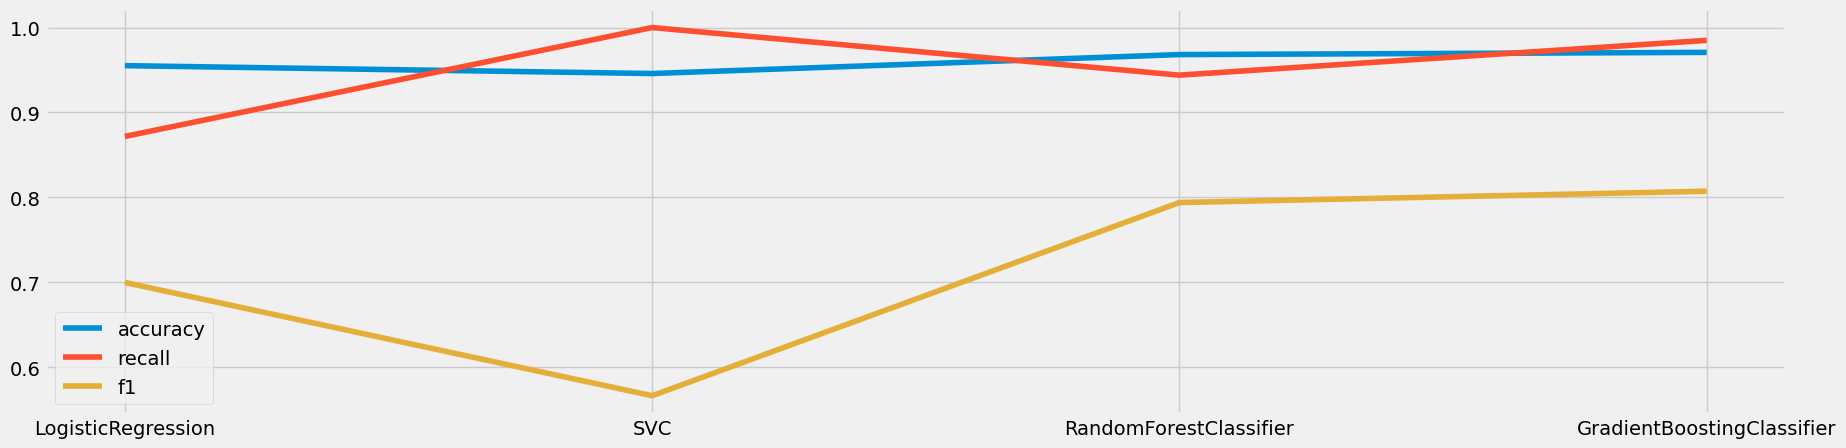

In [31]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(finalresult.algorithm,result1,label="accuracy")
plt.plot(finalresult.algorithm,result2,label="recall")
plt.plot(finalresult.algorithm,result3,label="f1")
plt.legend()
plt.show()

In [32]:
new_data = np.array([[1, 80, 1, 1,1,23.7,6.1,210]])
prediction = model4.predict(new_data)
print("Predicted result (1 means diabetic, 0 means not diabetic):", prediction[0])

probability = model4.predict_proba(new_data)[0, 1]
print(f"Probability of diabetes: {probability * 100:.2f}%")

Predicted result (1 means diabetic, 0 means not diabetic): 0
Probability of diabetes: 37.63%
